In [1]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid",context='talk', font_scale=1.1)
%matplotlib inline

In [2]:
%run metapop.py

In [3]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Wed Apr 05 2023

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 8.10.0

numpy     : 1.22.3
matplotlib: 3.7.0
pandas    : 1.5.3
scipy     : 1.7.1
seaborn   : 0.12.2

Watermark: 2.3.1



# Figure 1d

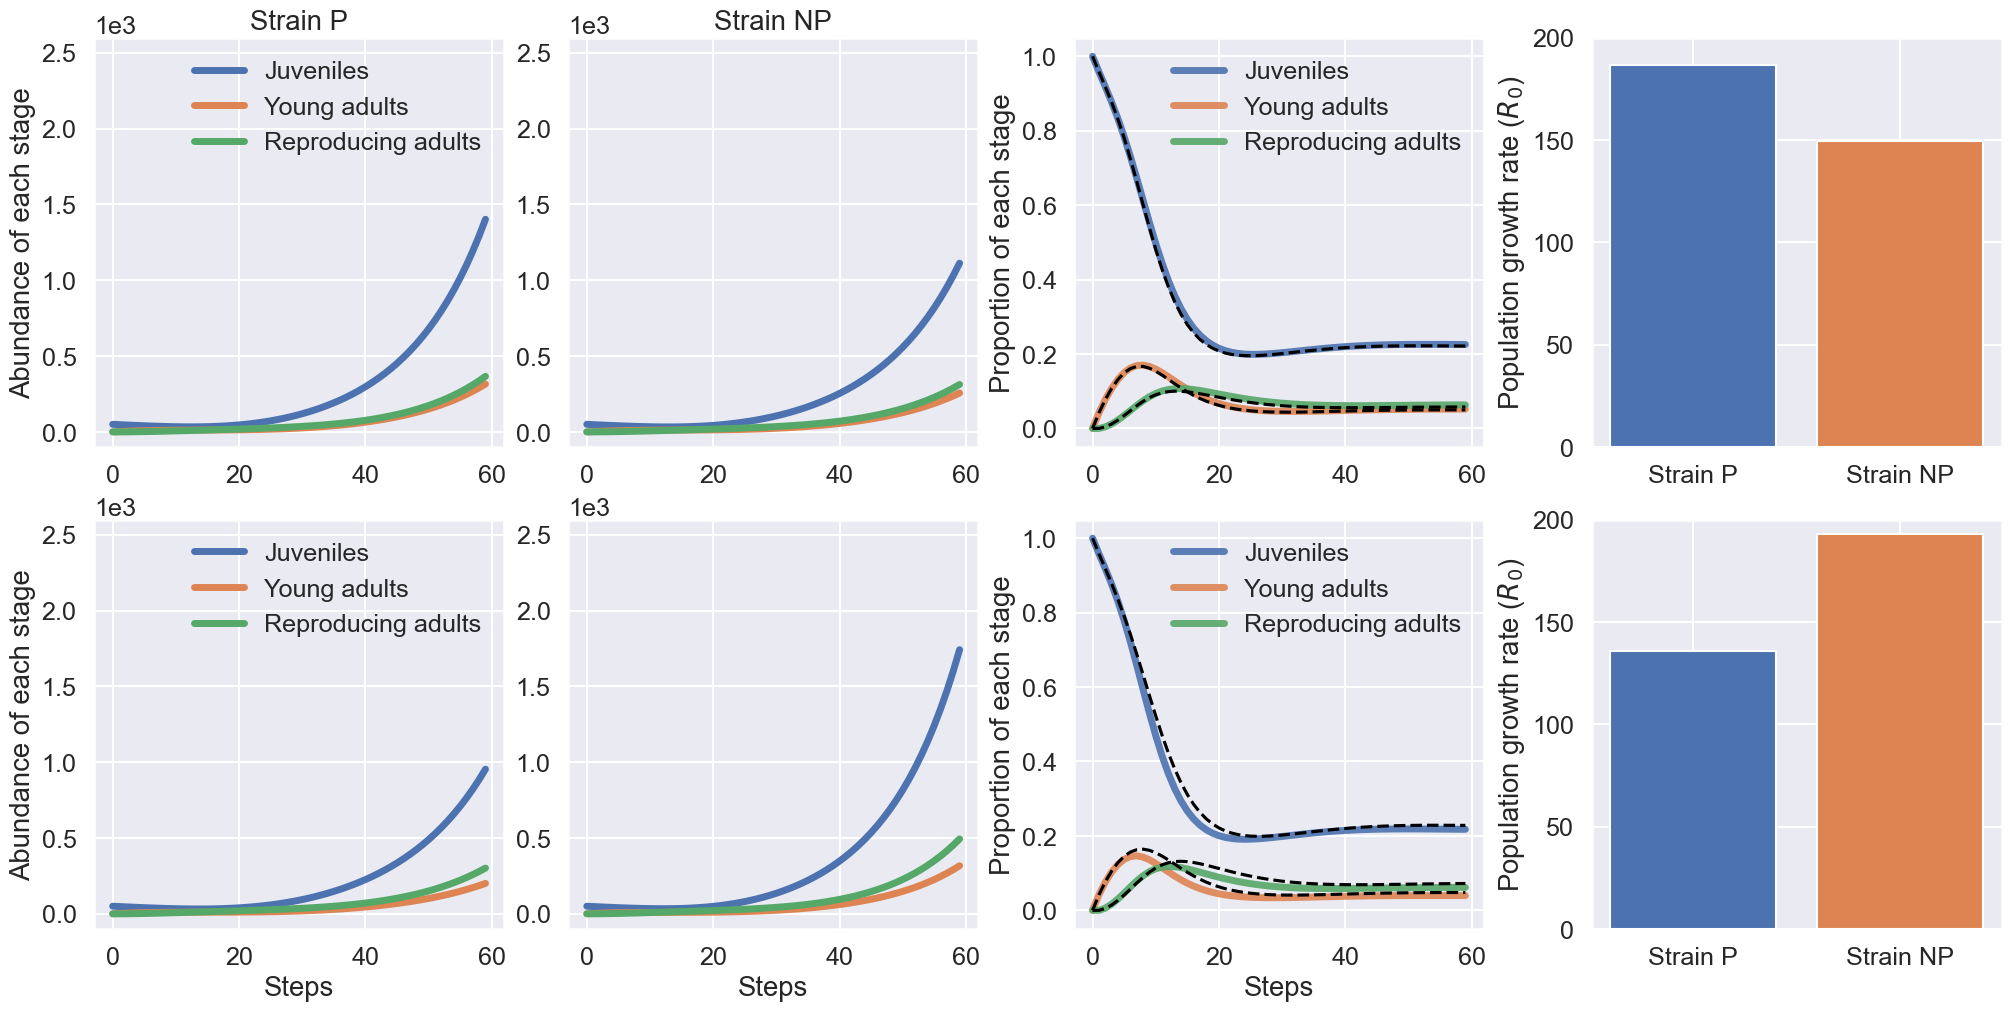

In [13]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=4,
    figsize=(20, 10),
    constrained_layout=True)

axes = axes.flatten()

n0 = np.array([[0], [50], [0], [0], [0], [0], [0], [0], [0], [0], [0], [50], [0], [0], [0], [0], [0], [0], [0], [0]])
pop = Population(n0, consumption=0.01, α=0.0)
pop.diet = 'OP50'
n_list = []
for i in range(60):
    n_list.append(pop.pop)
    pop.take_a_step()
    
axes[0].plot([m[1][0] for m in n_list], lw=5, label='Juveniles')
axes[0].plot([m[3][0] for m in n_list], lw=5, label='Young adults')
axes[0].plot([np.sum(m[4:9]) for m in n_list], lw=5, label='Reproducing adults')
axes[0].legend(frameon=False)

axes[1].plot([m[11][0] for m in n_list], lw=5, label='Juveniles')
axes[1].plot([m[13][0] for m in n_list], lw=5, label='Young adults')
axes[1].plot([np.sum(m[14:19]) for m in n_list], lw=5, label='Reproducing adults')

axes[2].plot([m[11][0]/np.sum(m[10:]) for m in n_list], color=sns.color_palette()[0], alpha=0.9, lw=5, label='Juveniles')
axes[2].plot([m[13][0]/np.sum(m[10:]) for m in n_list], color=sns.color_palette()[1], alpha=0.9, lw=5, label='Young adults')
axes[2].plot([np.sum(m[14:19])/np.sum(m[10:]) for m in n_list], color=sns.color_palette()[2], alpha=0.9, lw=5, label='Reproducing adults')


axes[2].plot([m[1][0]/np.sum(m[:10]) for m in n_list], color='black', ls='--')
axes[2].plot([m[3][0]/np.sum(m[:10]) for m in n_list], color='black', ls='--')
axes[2].plot([np.sum(m[4:9])/np.sum(m[:10]) for m in n_list], color='black', ls='--')



axes[2].legend(frameon=False)

axes[0].set(ylabel='Abundance of each stage', title='Strain P')

axes[1].set(title='Strain NP')

axes[2].set(ylabel='Proportion of each stage')

axes[3].bar([1, 2], [pop.growth_rate[0], pop.growth_rate[1]], color=[sns.color_palette()[0] , sns.color_palette()[1]])

axes[3].set(xticks=[1,2], xticklabels=['Strain P', 'Strain NP'])

for i in axes[:2]:
    # i.set_xlabel('Steps')
    i.set_ylim(-100, 2600)
    i.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
axes[3].set(ylabel=r'Population growth rate ($R_0$)', ylim=(0,200), yticks=np.linspace(0, 200, 5))


n0 = np.array([[0], [50], [0], [0], [0], [0], [0], [0], [0], [0], [0], [50], [0], [0], [0], [0], [0], [0], [0], [0]])
pop = Population(n0, consumption=0.01, α=0.0)
pop.diet = 'Novo'
n_list = []
for i in range(60):
    n_list.append(pop.pop)
    pop.take_a_step()

    
axes[4].plot([m[1][0] for m in n_list], lw=5, label='Juveniles')
axes[4].plot([m[3][0] for m in n_list], lw=5, label='Young adults')
axes[4].plot([np.sum(m[4:9]) for m in n_list], lw=5, label='Reproducing adults')
axes[4].legend(frameon=False)

axes[5].plot([m[11][0] for m in n_list], lw=5, label='Juveniles')
axes[5].plot([m[13][0] for m in n_list], lw=5, label='Young adults')
axes[5].plot([np.sum(m[14:19]) for m in n_list], lw=5, label='Reproducing adults')    

axes[6].plot([m[11][0]/np.sum(m[10:]) for m in n_list], color=sns.color_palette()[0], alpha=0.9, lw=5, label='Juveniles')
axes[6].plot([m[13][0]/np.sum(m[10:]) for m in n_list], color=sns.color_palette()[1], alpha=0.9, lw=5, label='Young adults')
axes[6].plot([np.sum(m[14:19])/np.sum(m[10:]) for m in n_list], color=sns.color_palette()[2], alpha=0.9, lw=5, label='Reproducing adults')


axes[6].plot([m[1][0]/np.sum(m[:10]) for m in n_list], color='black', ls='--')
axes[6].plot([m[3][0]/np.sum(m[:10]) for m in n_list], color='black', ls='--')
axes[6].plot([np.sum(m[4:9])/np.sum(m[:10]) for m in n_list], color='black', ls='--')

axes[6].legend(frameon=False)

axes[4].set(ylabel='Abundance of each stage')


axes[6].set(ylabel='Proportion of each stage')

axes[7].bar([1, 2], [pop.growth_rate[0], pop.growth_rate[1]], color=[sns.color_palette()[0] , sns.color_palette()[1]])

axes[7].set(xticks=[1,2], xticklabels=['Strain P', 'Strain NP'])

for i in axes[4:6]:
    i.set_xlabel('Steps')
    i.set_ylim(-100, 2600)
    i.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
axes[7].set(ylabel=r'Population growth rate ($R_0$)', ylim=(0,200), yticks=np.linspace(0, 200, 5))
axes[6].set_xlabel('Steps')

plt.savefig('./figures/PopDynamic_no_interaction.pdf', bbox_inches='tight', dpi=300)

# Figure 1a

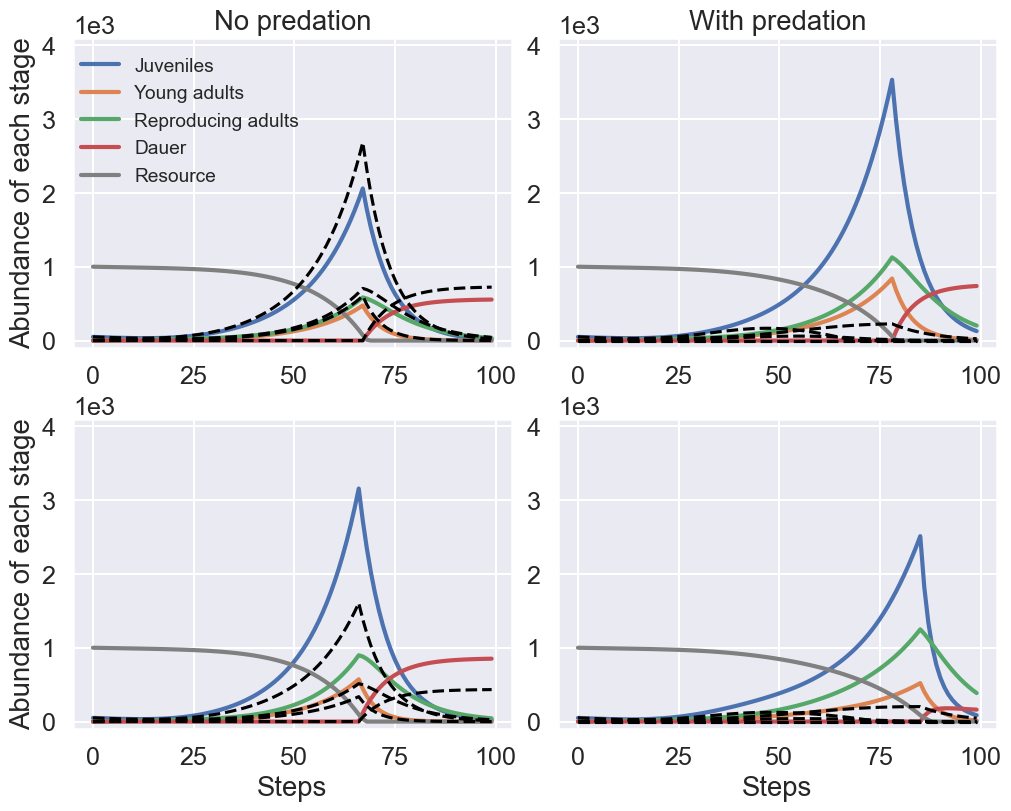

In [11]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(10, 8),
    constrained_layout=True)

axes = axes.flatten()

n0 = np.array([[0], [50], [0], [0], [0], [0], [0], [0], [0], [0], [0], [50], [0], [0], [0], [0], [0], [0], [0], [0]])
pop = Population(n0, consumption=0.01, α=0.0)
pop.diet = 'OP50'
n_list = []
r_list = []
for i in range(100):
    n_list.append(pop.pop)
    r_list.append(pop.resource)
    pop.take_a_step()

axes[0].plot([m[11][0] for m in n_list], lw=3, label='Juveniles')
axes[0].plot([m[13][0] for m in n_list], lw=3, label='Young adults')
axes[0].plot([np.sum(m[14:19]) for m in n_list], lw=3, label='Reproducing adults')
axes[0].plot([m[12][0] for m in n_list], lw=3, label='Dauer')
axes[0].plot(r_list, lw=3, color='gray', label='Resource')


axes[0].plot([m[1][0] for m in n_list], color='black', ls='--')
axes[0].plot([m[3][0] for m in n_list], color='black', ls='--')
axes[0].plot([np.sum(m[4:9]) for m in n_list],color='black', ls='--')
axes[0].plot([m[2][0] for m in n_list],color='black', ls='--')
axes[0].legend(loc=(0,0.5), frameon=False, fontsize='x-small')

n0 = np.array([[0], [50], [0], [0], [0], [0], [0], [0], [0], [0], [0], [50], [0], [0], [0], [0], [0], [0], [0], [0]])
pop = Population(n0, consumption=0.01, α=1e-3)
pop.diet = 'OP50'
n_list = []
r_list = []
for i in range(100):
    n_list.append(pop.pop)
    r_list.append(pop.resource)
    pop.take_a_step()

axes[1].plot([m[11][0] for m in n_list], lw=3, label='Juveniles')
axes[1].plot([m[13][0] for m in n_list], lw=3, label='Young adults')
axes[1].plot([np.sum(m[14:19]) for m in n_list], lw=3, label='Reproducing adults')
axes[1].plot([m[12][0] for m in n_list], lw=3, label='Dauer')
axes[1].plot(r_list, lw=3, color='gray', label='Resource')
axes[1].plot([m[1][0] for m in n_list], color='black', ls='--')
axes[1].plot([m[3][0] for m in n_list], color='black', ls='--')
axes[1].plot([np.sum(m[4:9]) for m in n_list],color='black', ls='--')
axes[1].plot([m[2][0] for m in n_list],color='black', ls='--')


n0 = np.array([[0], [50], [0], [0], [0], [0], [0], [0], [0], [0], [0], [50], [0], [0], [0], [0], [0], [0], [0], [0]])
pop = Population(n0, consumption=0.01, α=0)
pop.diet = 'Novo'
n_list = []
r_list = []
for i in range(100):
    n_list.append(pop.pop)
    r_list.append(pop.resource)
    pop.take_a_step()

axes[2].plot([m[11][0] for m in n_list], lw=3, label='Juveniles')
axes[2].plot([m[13][0] for m in n_list], lw=3, label='Young adults')
axes[2].plot([np.sum(m[14:19]) for m in n_list], lw=3, label='Reproducing adults')
axes[2].plot([m[12][0] for m in n_list], lw=3, label='Dauer')
axes[2].plot(r_list, lw=3, color='gray', label='Resource')
axes[2].plot([m[1][0] for m in n_list], color='black', ls='--')
axes[2].plot([m[3][0] for m in n_list], color='black', ls='--')
axes[2].plot([np.sum(m[4:9]) for m in n_list],color='black', ls='--')
axes[2].plot([m[2][0] for m in n_list],color='black', ls='--')

n0 = np.array([[0], [50], [0], [0], [0], [0], [0], [0], [0], [0], [0], [50], [0], [0], [0], [0], [0], [0], [0], [0]])
pop = Population(n0, consumption=0.01, α=1e-3)
pop.diet = 'Novo'
n_list = []
r_list = []
for i in range(100):
    n_list.append(pop.pop)
    r_list.append(pop.resource)
    pop.take_a_step()

axes[3].plot([m[11][0] for m in n_list], lw=3, label='Juveniles')
axes[3].plot([m[13][0] for m in n_list], lw=3, label='Young adults')
axes[3].plot([np.sum(m[14:19]) for m in n_list], lw=3, label='Reproducing adults')
axes[3].plot([m[12][0] for m in n_list], lw=3, label='Dauer')
axes[3].plot(r_list, lw=3, color='gray', label='Resource')
axes[3].plot([m[1][0] for m in n_list], color='black', ls='--')
axes[3].plot([m[3][0] for m in n_list], color='black', ls='--')
axes[3].plot([np.sum(m[4:9]) for m in n_list],color='black', ls='--')
axes[3].plot([m[2][0] for m in n_list],color='black', ls='--')


for i in axes[2:]:
    i.set_xlabel('Steps')

for i in [0,2]:
    axes[i].set_ylabel('Abundance of each stage')
    
axes[0].set(title='No predation')

axes[1].set(title='With predation')

for i in axes:
    i.set_ylim(-100, 4100)
    i.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.savefig('./figures/PopDynamic_with_interaction.pdf', bbox_inches='tight', dpi=300)

# Figure 2d

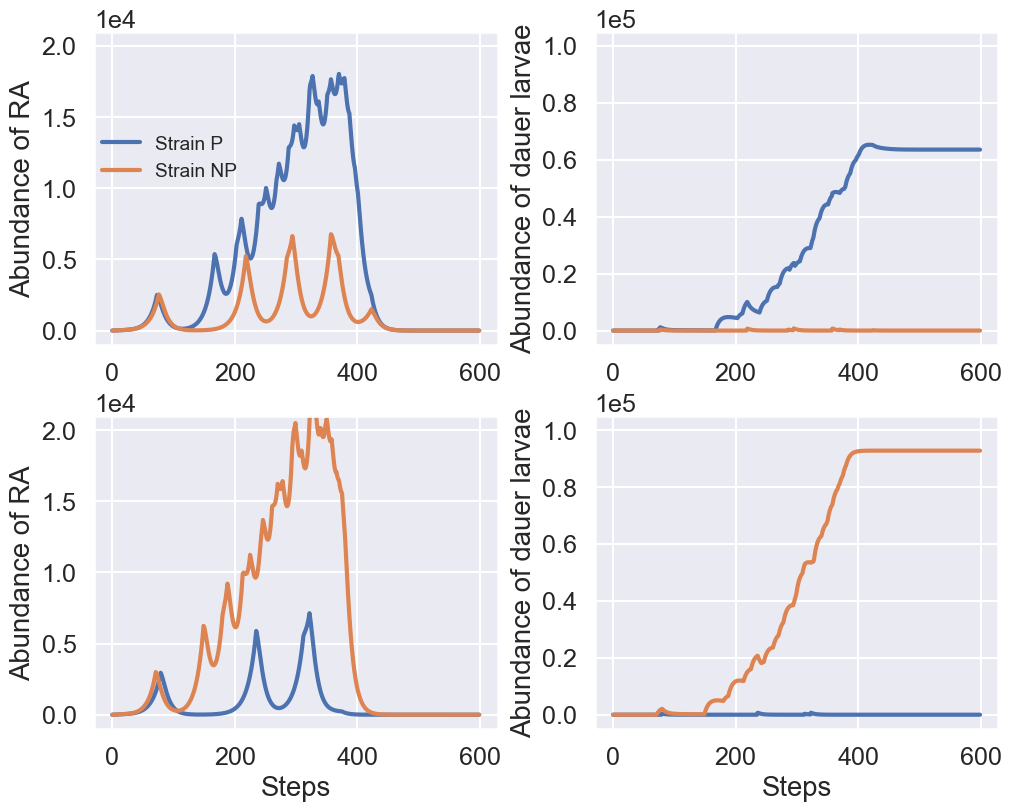

In [30]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(10, 8),
    constrained_layout=True)

axes = axes.flatten()

att_rate = 1e-3
disp_rate = 0.01
dim = 10

metpop = MetaPopulation(dim, att_rate, 0.01, r_rate=disp_rate)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((9,9), 'A')
metpop.add_pop((0,9), 'C')
metpop.add_pop((9,0), 'C')
metpop.set_diet_comp('OP50')

dist_t = []
dis_a = []
for i in range(600):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dist_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.diffuse_dauer()
    
axes[0].plot([np.sum(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[0].plot([np.sum(i[1]) for i in dis_a], lw=3, label="Strain NP")

axes[0].legend(loc=(0,0.5), frameon=False, fontsize='x-small')

axes[1].plot([np.sum(i[0]) for i in dist_t], lw=3, label="Strain P")
axes[1].plot([np.sum(i[1]) for i in dist_t], lw=3, label="Strain NP")


metpop = MetaPopulation(10, att_rate, 0.01, r_rate=disp_rate)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((9,9), 'A')
metpop.add_pop((0,9), 'C')
metpop.add_pop((9,0), 'C')
metpop.set_diet_comp('Novo')


dist_t = []
dis_a = []
for i in range(600):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dist_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.diffuse_dauer()
    
axes[2].plot([np.sum(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[2].plot([np.sum(i[1]) for i in dis_a], lw=3, label="Strain NP")


axes[3].plot([np.sum(i[0]) for i in dist_t], lw=3, label="Strain P")
axes[3].plot([np.sum(i[1]) for i in dist_t], lw=3, label="Strain NP")
    
for i in axes:
    i.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
for i in [0,2]:
    axes[i].set_ylim(-1000, 2e4 + 1000)
    
for i in [1,3]:
    axes[i].set_ylim(-5000, 10e4 + 5000)
    
axes[0].set_ylabel('Abundance of RA', fontsize=20)
axes[2].set_ylabel('Abundance of RA')
axes[1].set_ylabel('Abundance of dauer larvae')
axes[3].set_ylabel('Abundance of dauer larvae')

axes[2].set_xlabel('Steps')
axes[3].set_xlabel('Steps')

plt.savefig('./figures/meta_uniform.pdf', bbox_inches='tight', dpi=300)

# Figure 3a

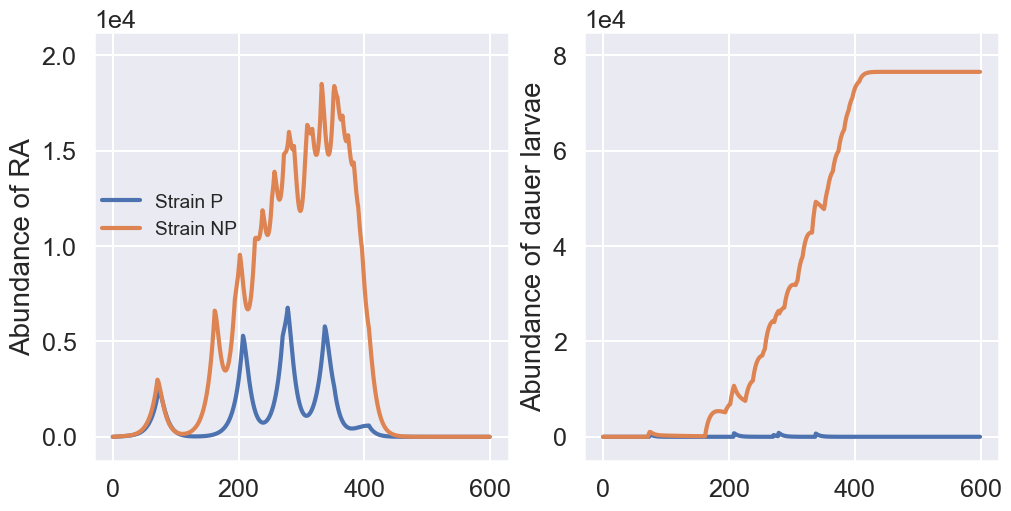

In [38]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(10, 5),
    constrained_layout=True)

axes = axes.flatten()

att_rate = 1e-3
disp_rate = 0.01
dim = 10

metpop = MetaPopulation(dim, att_rate, 0.01, r_rate=disp_rate)


metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')
metpop.set_diet_comp('quad_1')

dist_t = []
dis_a = []
for i in range(600):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dist_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.diffuse_dauer()
    
axes[0].plot([np.sum(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[0].plot([np.sum(i[1]) for i in dis_a], lw=3, label="Strain NP")

axes[0].legend(loc=(0,0.5), frameon=False, fontsize='x-small')

axes[1].plot([np.sum(i[0]) for i in dist_t], lw=3, label="Strain P")
axes[1].plot([np.sum(i[1]) for i in dist_t], lw=3, label="Strain NP")
    
for i in axes:
    i.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


axes[0].set_ylim(-1250, 2e4 + 1250)
axes[1].set_ylim(-5000, 8e4 + 5000)
    
axes[0].set_ylabel('Abundance of RA', fontsize=20)
axes[1].set_ylabel('Abundance of dauer larvae')

plt.savefig('./figures/meta_quad_1.pdf', bbox_inches='tight', dpi=300)

[[], []]

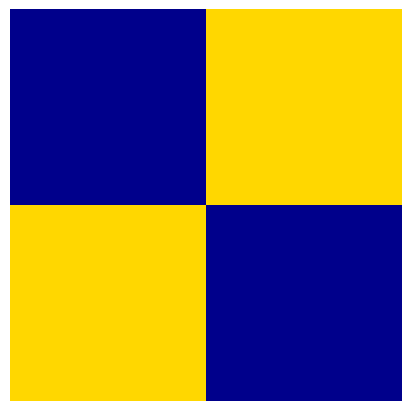

In [13]:
resource_dist = np.zeros((dim, dim))

for i in metpop.index:
    if metpop.metapop[i].diet == 'Novo':
        resource_dist[i[0]][i[1]] = 1


fig, ax = plt.subplots(
nrows=1,
ncols=1,
figsize=(4, 4),
constrained_layout=True)

sns.heatmap(resource_dist, ax = ax, cbar=False, cmap=['darkblue', 'gold'])
ax.set(yticks=[], xticks=[])

#plt.savefig('./figures/meta_quad_1_patt.pdf', bbox_inches='tight', dpi=300)

# Figure 3b

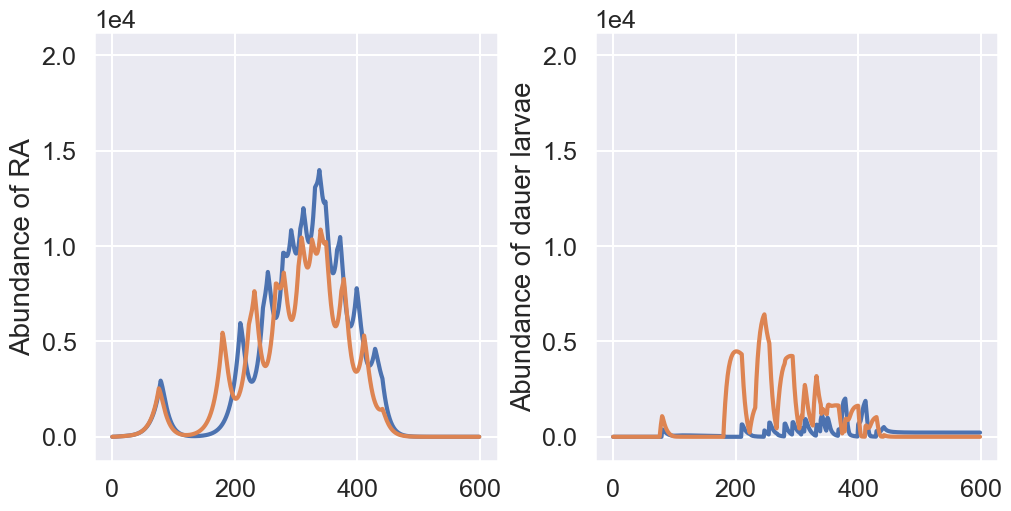

In [40]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(10, 5),
    constrained_layout=True)

axes = axes.flatten()

att_rate = 1e-3
disp_rate = 0.01
dim = 10

metpop = MetaPopulation(dim, att_rate, 0.01, r_rate=disp_rate)


metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')
metpop.set_diet_comp('quad_2')

dist_t = []
dis_a = []
for i in range(600):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dist_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.diffuse_dauer()
    
axes[0].plot([np.sum(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[0].plot([np.sum(i[1]) for i in dis_a], lw=3, label="Strain NP")

# axes[0].legend(loc=(0,0.5), frameon=False, fontsize='x-small')

axes[1].plot([np.sum(i[0]) for i in dist_t], lw=3, label="Strain P")
axes[1].plot([np.sum(i[1]) for i in dist_t], lw=3, label="Strain NP")
    
for i in axes:
    i.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

axes[0].set_ylim(-1250, 2e4 + 1250)
axes[1].set_ylim(-1250, 2e4 + 1250)
#axes[1].set_ylim(-5000, 8e4 + 5000)
    
axes[0].set_ylabel('Abundance of RA', fontsize=20)
axes[1].set_ylabel('Abundance of dauer larvae')

plt.savefig('./figures/meta_quad_2.pdf', bbox_inches='tight', dpi=300)

[[], []]

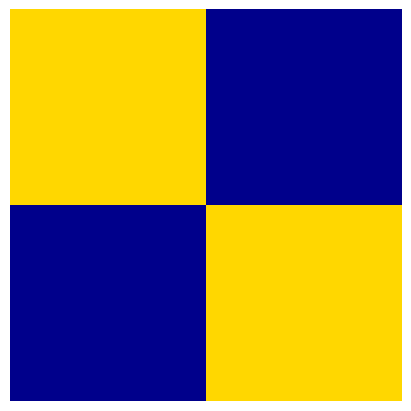

In [15]:
resource_dist = np.zeros((dim, dim))

for i in metpop.index:
    if metpop.metapop[i].diet == 'Novo':
        resource_dist[i[0]][i[1]] = 1


fig, ax = plt.subplots(
nrows=1,
ncols=1,
figsize=(4, 4),
constrained_layout=True)

sns.heatmap(resource_dist, ax = ax, cbar=False, cmap=['darkblue', 'gold'])
ax.set(yticks=[], xticks=[])

#plt.savefig('./figures/meta_quad_2_patt.pdf', bbox_inches='tight', dpi=300)

# Figure 3c

Text(0.5, 0, 'Steps')

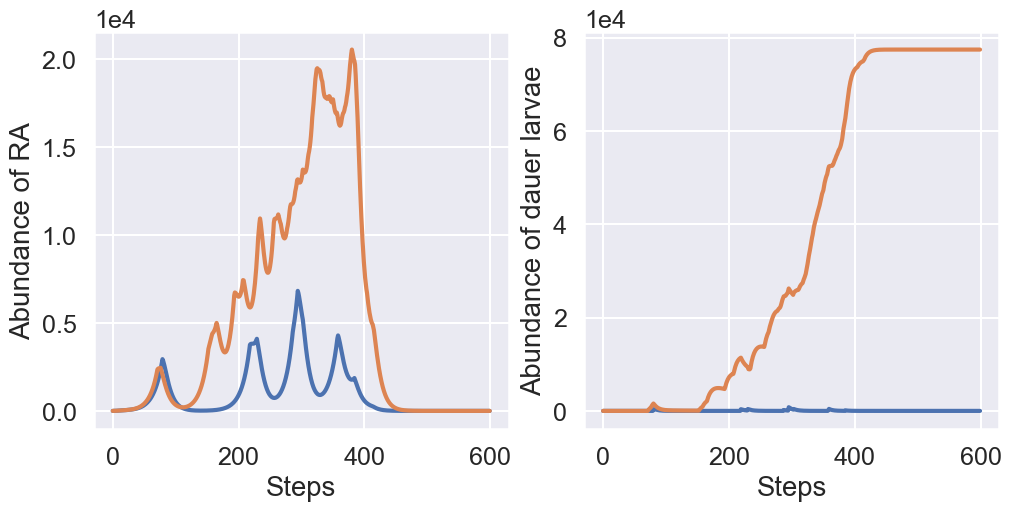

In [16]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(10, 5),
    constrained_layout=True)

axes = axes.flatten()

att_rate = 1e-3
disp_rate = 0.01
dim = 10

metpop = MetaPopulation(dim, att_rate, 0.01, r_rate=disp_rate)


metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')
metpop.set_diet_comp('rand')

dist_t = []
dis_a = []
for i in range(600):
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dist_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.diffuse_dauer()
    
axes[0].plot([np.sum(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[0].plot([np.sum(i[1]) for i in dis_a], lw=3, label="Strain NP")

# axes[0].legend(loc=(0,0.5), frameon=False, fontsize='x-small')

axes[1].plot([np.sum(i[0]) for i in dist_t], lw=3, label="Strain P")
axes[1].plot([np.sum(i[1]) for i in dist_t], lw=3, label="Strain NP")
    
for i in axes:
    i.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
axes[0].set_ylabel('Abundance of RA', fontsize=20)
axes[1].set_ylabel('Abundance of dauer larvae')

axes[0].set_xlabel('Steps')
axes[1].set_xlabel('Steps')

#plt.savefig('./figures/meta_rand.pdf', bbox_inches='tight', dpi=300)

[[], []]

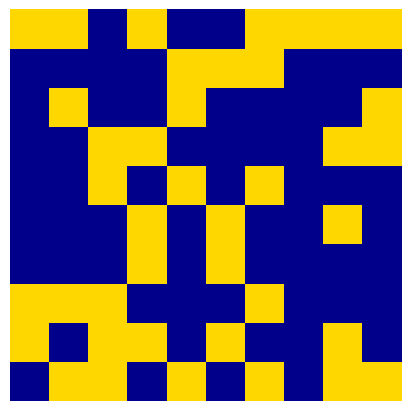

In [17]:
resource_dist = np.zeros((dim, dim))

for i in metpop.index:
    if metpop.metapop[i].diet == 'Novo':
        resource_dist[i[0]][i[1]] = 1


fig, ax = plt.subplots(
nrows=1,
ncols=1,
figsize=(4, 4),
constrained_layout=True)

sns.heatmap(resource_dist, ax = ax, cbar=False, cmap=['darkblue', 'gold'])
ax.set(yticks=[], xticks=[])

#plt.savefig('./figures/meta_rand_patt.pdf', bbox_inches='tight', dpi=300)

# Figure 4

100%|██████████| 1000/1000 [00:17<00:00, 57.44it/s]


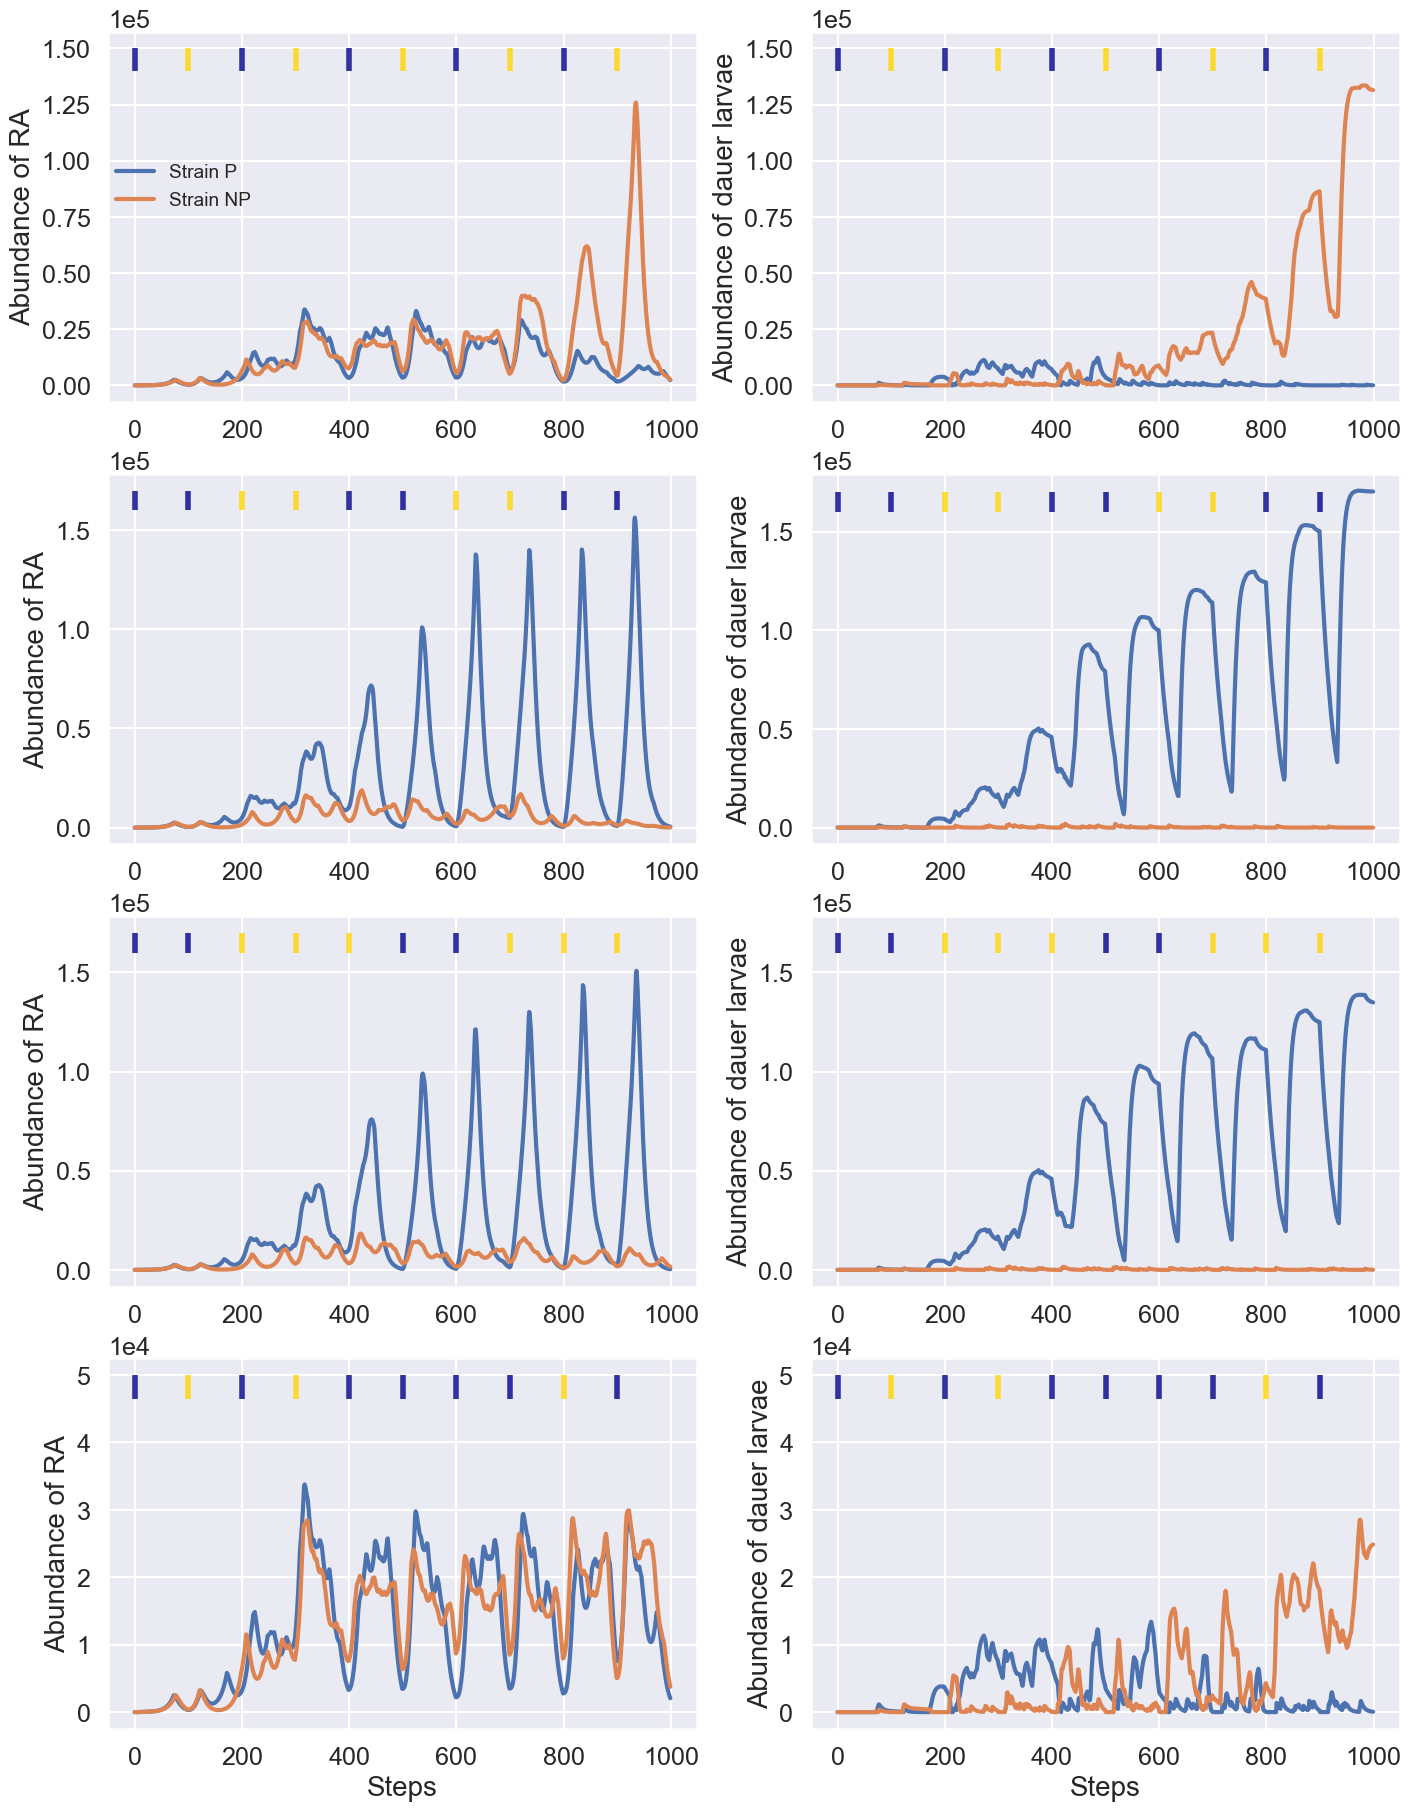

In [18]:
fig, axes = plt.subplots(
    nrows=4,
    ncols=2,
    figsize=(14, 18),
    constrained_layout=True)

axes = axes.flatten()

for i in np.arange(1, len(axes), 2):
    axes[i].set_ylabel('Abundance of dauer larvae')
for i in np.arange(0, len(axes), 2):
    axes[i].set_ylabel('Abundance of RA', fontsize=20)

axes[6].set_xlabel('Steps', fontsize=20)
axes[7].set_xlabel('Steps', fontsize=20)

for i in axes:
    i.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

lst = np.arange(0, 1000, 100)
env_cycle = [i for i,j in zip(cycle(['OP50', 'Novo']), lst)]
att_rate = 1e-3
disp_rate = 0.01
dim = 10
metpop = MetaPopulation(dim, att_rate, 0.01, r_rate=disp_rate)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')
dist_t = []
dis_a = []
count = 0
for i in tqdm(range(1000)):
    if not i%100:
        metpop.set_diet_comp(env_cycle[count])
        metpop.reset_food()
        count += 1
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dist_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.diffuse_dauer()
    
axes[0].plot([np.sum(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[0].plot([np.sum(i[1]) for i in dis_a], lw=3, label="Strain NP")

axes[0].legend(loc=(0,0.5), frameon=False, fontsize='x-small')

axes[1].plot([np.sum(i[0]) for i in dist_t], lw=3, label="Strain P")
axes[1].plot([np.sum(i[1]) for i in dist_t], lw=3, label="Strain NP")

for i in axes[:2]:
    for j,k in zip(lst, env_cycle):   
        if k == 'Novo':
            i.vlines(j, 1.4e5, 1.5e5, color='gold', zorder=3, lw=4, alpha=0.8)
        else:
            i.vlines(j, 1.4e5, 1.5e5, color='darkblue', zorder=3, lw=4, alpha=0.8)
            

lst = np.arange(0, 1000, 100)
env_cycle = 2*['OP50', 'OP50', 'Novo', 'Novo'] + ['OP50', 'OP50']
att_rate = 1e-3
disp_rate = 0.01
dim = 10
metpop = MetaPopulation(dim, att_rate, 0.01, r_rate=disp_rate)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')

dist_t = []
dis_a = []
count = 0
for i in tqdm(range(1000)):
    if not i%100:
        metpop.set_diet_comp(env_cycle[count])
        metpop.reset_food()
        count += 1
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dist_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.diffuse_dauer()
    
axes[2].plot([np.sum(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[2].plot([np.sum(i[1]) for i in dis_a], lw=3, label="Strain NP")    
axes[3].plot([np.sum(i[0]) for i in dist_t], lw=3, label="Strain P")
axes[3].plot([np.sum(i[1]) for i in dist_t], lw=3, label="Strain NP")

for i in axes[2:4]:
    for j,k in zip(lst, env_cycle):   
        if k == 'Novo':
            i.vlines(j, 1.6e5, 1.7e5, color='gold', zorder=3, lw=4, alpha=0.8)
        else:
            i.vlines(j, 1.6e5, 1.7e5, color='darkblue', zorder=3, lw=4, alpha=0.8)


lst = np.arange(0, 1000, 100)
env_cycle = 2*['OP50', 'OP50', 'Novo', 'Novo', 'Novo']
att_rate = 1e-3
disp_rate = 0.01
dim = 10
metpop = MetaPopulation(dim, att_rate, 0.01, r_rate=disp_rate)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')

dist_t = []
dis_a = []
count = 0
for i in tqdm(range(1000)):
    if not i%100:
        metpop.set_diet_comp(env_cycle[count])
        metpop.reset_food()
        count += 1
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dist_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.diffuse_dauer()
    
axes[4].plot([np.sum(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[4].plot([np.sum(i[1]) for i in dis_a], lw=3, label="Strain NP")    
axes[5].plot([np.sum(i[0]) for i in dist_t], lw=3, label="Strain P")
axes[5].plot([np.sum(i[1]) for i in dist_t], lw=3, label="Strain NP")

for i in axes[4:6]:
    for j,k in zip(lst, env_cycle):   
        if k == 'Novo':
            i.vlines(j, 1.6e5, 1.7e5, color='gold', zorder=3, lw=4, alpha=0.8)
        else:
            i.vlines(j, 1.6e5, 1.7e5, color='darkblue', zorder=3, lw=4, alpha=0.8)
            
lst = np.arange(0, 1000, 100)           
#env_cycle = np.random.choice(['OP50', 'Novo'], size=len(lst))
env_cycle=['OP50', 'Novo', 'OP50', 'Novo', 'OP50', 'OP50', 'OP50', 'OP50', 'Novo', 'OP50']
att_rate = 1e-3
disp_rate = 0.01
dim = 10
metpop = MetaPopulation(dim, att_rate, 0.01, r_rate=disp_rate)
metpop.fill_pop()
metpop.add_pop((0,0), 'A')
metpop.add_pop((dim-1,dim-1), 'A')
metpop.add_pop((0,dim-1), 'C')
metpop.add_pop((dim-1,0), 'C')

dist_t = []
dis_a = []
count = 0
for i in tqdm(range(1000)):
    if not i%100:
        metpop.set_diet_comp(env_cycle[count])
        metpop.reset_food()
        count += 1
    metpop.simulate_pops_one_step()
    a, b = metpop.daur_dist
    t1, t2 = metpop.ra_dist
    dist_t.append((a, b))
    dis_a.append((t1, t2))
    metpop.diffuse_dauer()
    
axes[6].plot([np.sum(i[0]) for i in dis_a], lw=3, label="Strain P")
axes[6].plot([np.sum(i[1]) for i in dis_a], lw=3, label="Strain NP")    
axes[7].plot([np.sum(i[0]) for i in dist_t], lw=3, label="Strain P")
axes[7].plot([np.sum(i[1]) for i in dist_t], lw=3, label="Strain NP")

for i in axes[6:8]:
    for j,k in zip(lst, env_cycle):   
        if k == 'Novo':
            i.vlines(j, 0.465e5, 0.5e5, color='gold', zorder=3, lw=4, alpha=0.8)
        else:
            i.vlines(j, 0.465e5, 0.5e5, color='darkblue', zorder=3, lw=4, alpha=0.8)
            
#plt.savefig('./figures/temp_fluct.pdf', bbox_inches='tight', dpi=300)